# Pymaceuticals Inc.
---

### Analysis

The total test group with all treatments combined were nearly 50/50 females/males. I would have like to have seen queries including that factor. Did the sex of the mice make a difference in tumor volume, weight, drug regimen, etc.?

A trend was found of tumor volume and weight. The higher the weight, the higher the tumor volume.

The linear regression line and the correlation coefficient followed the trend of tumor volume and weight.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(combined_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [28]:
# Checking the number of mice.
# Checking the number of unique mice
number_of_mice = combined_data["Mouse ID"].nunique()
print(f"Number of unique mice: {number_of_mice}")

Number of unique mice: 249


In [29]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_data = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_id = duplicate_data['Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [30]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_id = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_id = combined_data[combined_data.duplicated(keep=False)]
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_id['Mouse ID'])]
duplicate_mouse_data
print 

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'] != 'g989']
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
#Display the number of unique mice IDs after g989 removed from 
num_clean_mice = clean_data['Mouse ID'].nunique()
print(f"Number of mice in the clean DataFrame: {num_clean_mice}")

Number of mice in the clean DataFrame: 248


## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

#check
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
clean_data_copy_df=pd.DataFrame(clean_data) #new df for plotting.

In [35]:
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem=lambda x: x.std() / (len(x) ** 0.5)  # SEM calculation
).reset_index()
summary_stats.set_index('Drug Regimen', inplace=True)

# Renamed the columns in summary_stats
summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'variance': 'Tumor Volume Variance',
    'std_dev': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
}, inplace=True)

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

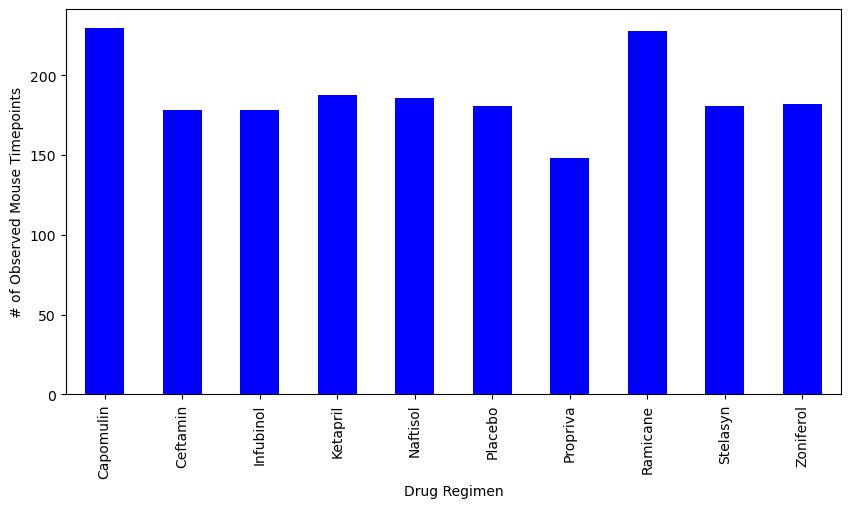

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_data_df = pd.DataFrame(clean_data)

# Group by Drug Regimen and count the number of rows
regimen_counts = clean_data_df.groupby('Drug Regimen').size()

# Generate the bar plot
regimen_counts.plot(kind='bar', figsize=(10, 5), color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Preparing data for pie charts: List Option, Turning dataframe into a list of lists to use with pyplot.
list_of_lists = clean_data_df.values.tolist()
#print(list_of_lists)

[['k403', 'Ramicane', 'Male', 21, 16, 0, 45.0, 0], ['k403', 'Ramicane', 'Male', 21, 16, 5, 38.82589807, 0], ['k403', 'Ramicane', 'Male', 21, 16, 10, 35.01427146, 1], ['k403', 'Ramicane', 'Male', 21, 16, 15, 34.22399174, 1], ['k403', 'Ramicane', 'Male', 21, 16, 20, 32.99772858, 1], ['k403', 'Ramicane', 'Male', 21, 16, 25, 33.46457735, 1], ['k403', 'Ramicane', 'Male', 21, 16, 30, 31.09949753, 1], ['k403', 'Ramicane', 'Male', 21, 16, 35, 26.54699343, 1], ['k403', 'Ramicane', 'Male', 21, 16, 40, 24.36550471, 1], ['k403', 'Ramicane', 'Male', 21, 16, 45, 22.05012627, 1], ['s185', 'Capomulin', 'Female', 3, 17, 0, 45.0, 0], ['s185', 'Capomulin', 'Female', 3, 17, 5, 43.87849569, 0], ['s185', 'Capomulin', 'Female', 3, 17, 10, 37.61494768, 0], ['s185', 'Capomulin', 'Female', 3, 17, 15, 38.17723195, 0], ['s185', 'Capomulin', 'Female', 3, 17, 20, 36.86687576, 0], ['s185', 'Capomulin', 'Female', 3, 17, 25, 33.94994037, 0], ['s185', 'Capomulin', 'Female', 3, 17, 30, 32.95967078, 1], ['s185', 'Capomul

In [38]:
#Preparing data for pie charts: Dictionary Option, Turning dataframe into a list of dictionaries to use with pyplot.
clean_data_df.to_dict(orient='records')
clean_data_dict = clean_data_df
clean_data_dict

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


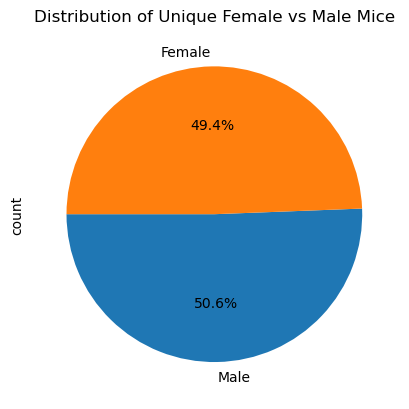

In [39]:
# Generate a pie chart, using pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
gender_counts = combined_data['Sex'].value_counts()
#gender_counts

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('count')  # Show the y-label
plt.show()

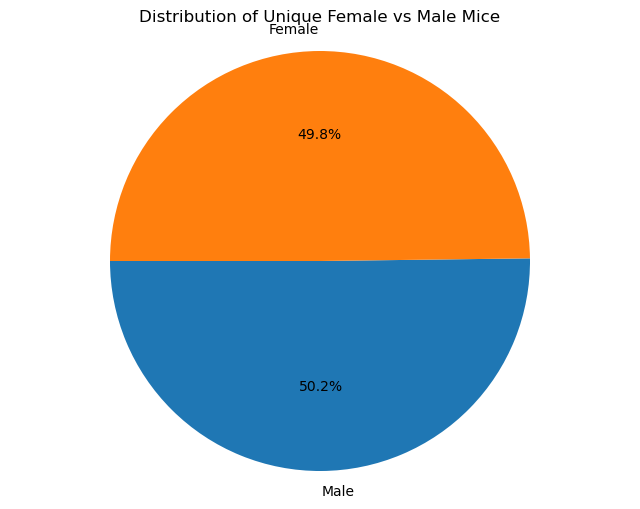

In [40]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = combined_data.drop_duplicates(subset='Mouse ID')  # Ensure unique entries based on Mouse ID
gender_counts = unique_mice['Sex'].value_counts()
# Make the pie chart
plt.figure(figsize=(8, 6))
plt.title('Distribution of Unique Female vs Male Mice')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#final_tumor_volume contains the last timepoint and corresponding tumor volume for each mouse
final_tumor_volume = pd.merge(last_timepoint, combined_data, on=['Mouse ID', 'Timepoint'])

#print(final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', 'Timepoint']])
#print(final_tumor_volume['Drug Regimen'].unique())
final_tumor_volume


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [42]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Loop through each treatment
for treatment in treatment_list:
    # Filter the DataFrame for the current treatment
    final_tumor_volume = combined_data[combined_data['Drug Regimen'] == treatment]
    #this filter above needs to be modified
    # Append the tumor volume data to the list
    tumor_volume_data.append(final_tumor_volume['Tumor Volume (mm3)'].values)

    # Calculate the IQR (Interquartile Range) and determine potential outliers
    Q1 = final_tumor_volume['Tumor Volume (mm3)'].quantile(0.25) # First quartile
    Q3 = final_tumor_volume['Tumor Volume (mm3)'].quantile(0.75) # Third quartile
    IQR = Q3 - Q1

    # Determine the lower and upper bounds
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Identify potential outliers
    potential_outliers = final_tumor_volume[(final_tumor_volume['Tumor Volume (mm3)'] < lower_bound) | 
                                             (final_tumor_volume['Tumor Volume (mm3)'] > upper_bound)]

    # Print results for the current treatment
    print(f"Treatment: {treatment}")
    print(f"The lower quartile (Q1) is: {Q1}")
    print(f"The upper quartile (Q3) is: {Q3}")
    print(f"The IQR is: {IQR}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"Potential outliers:\n{potential_outliers[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]}\n")

Treatment: Capomulin
The lower quartile (Q1) is: 37.685932865
The upper quartile (Q3) is: 45.0
The IQR is: 7.314067135000002
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
Potential outliers:
   Mouse ID Drug Regimen  Tumor Volume (mm3)
18     s185    Capomulin           25.472143
19     s185    Capomulin           23.343598

Treatment: Ramicane
The lower quartile (Q1) is: 36.674634585
The upper quartile (Q3) is: 45.0
The IQR is: 8.325365415
Values below 24.1865864625 could be outliers.
Values above 57.488048122500004 could be outliers.
Potential outliers:
  Mouse ID Drug Regimen  Tumor Volume (mm3)
9     k403     Ramicane           22.050126

Treatment: Infubinol
The lower quartile (Q1) is: 47.3123533
The upper quartile (Q3) is: 57.314443967500004
The IQR is: 10.002090667500006
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.
Potential outliers:
Empty DataFrame
Columns: [Mouse ID, Dru

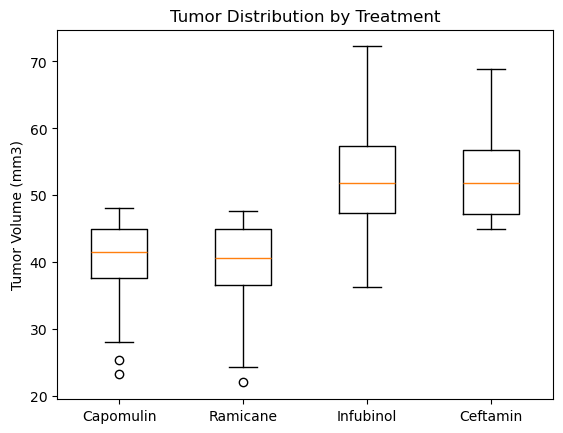

In [43]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.boxplot(tumor_volume_data, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Distribution by Treatment')
plt.show()


## Line and Scatter Plots

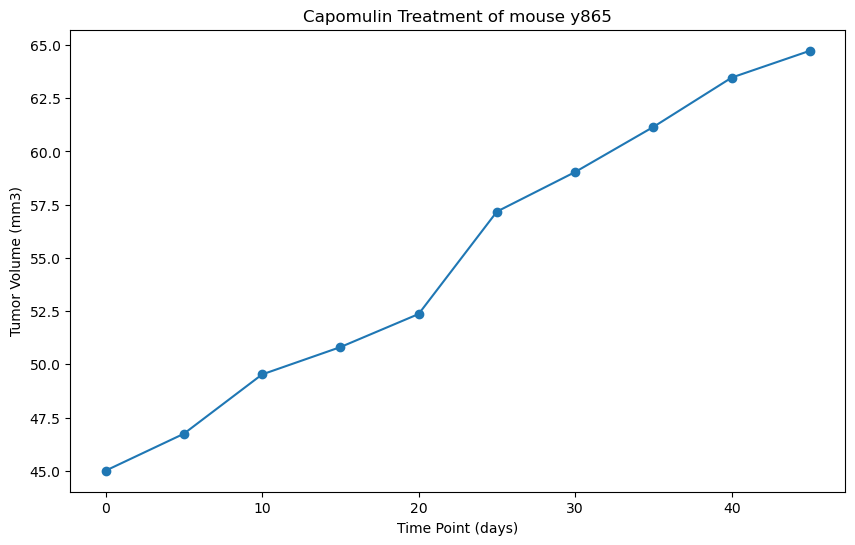

In [44]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# # Filter the DataFrame for a specific mouse (e.g., mouse ID 'l509')
#IMPORTANT NOTE GOING FORWARD: mouse ID 1509 nor l509 exists within the combined data frames.
##CHOSE replacement mouse_id y865 where the unique mouse_id is required.

mouse_data = final_tumor_volume.copy()  # Use .copy()
mouse_id = 'y865'
specific_mouse_data = mouse_data[mouse_data['Mouse ID'] == 'y865']
# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(specific_mouse_data['Timepoint'], specific_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-')
plt.title(f'Capomulin Treatment of mouse y865')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


In [45]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#data check
#print(clean_data_copy_df['Drug Regimen'].unique())

In [46]:
#checks complete in previous cell; generated scatter plot:
#clean_data_copy_df['Drug Regimen'] = clean_data_copy_df['Drug Regimen'].str.strip()

#Filtered for Capomulin regimen
capomulin_df = clean_data_copy_df[clean_data_copy_df['Drug Regimen'] == 'Capomulin']

#print(capomulin_df)

In [47]:
# Group by mouse weight and calculate the average tumor volume
capomulin_df_avg = capomulin_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

#print(capomulin_df_avg)

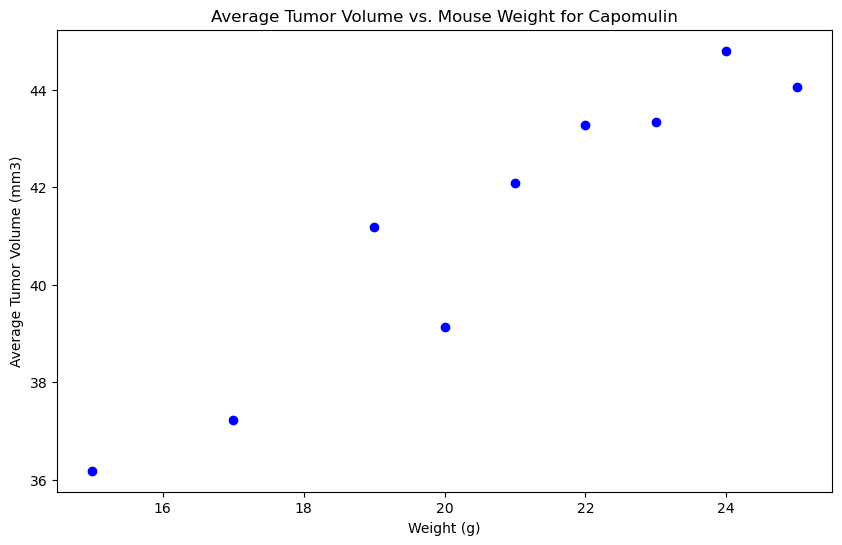

In [48]:
# Created the scatter plot
if not capomulin_df_avg.empty:
    plt.figure(figsize=(10, 6))
    plt.scatter(capomulin_df_avg['Weight (g)'], capomulin_df_avg['Tumor Volume (mm3)'], color='blue')
    plt.xlabel('Weight (g)')
    plt.ylabel('Average Tumor Volume (mm3)')
    plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin')

# Set limits if necessary for slightly different view. (Both plots look good.)
    #plt.xlim(min(capomulin_df_avg['Weight (g)']) - 10, max(capomulin_df_avg['Weight (g)']) + 10)
    #plt.ylim(min(capomulin_df_avg['Tumor Volume (mm3)']) - 10, max(capomulin_df_avg['Tumor Volume (mm3)']) + 10)

    plt.show()

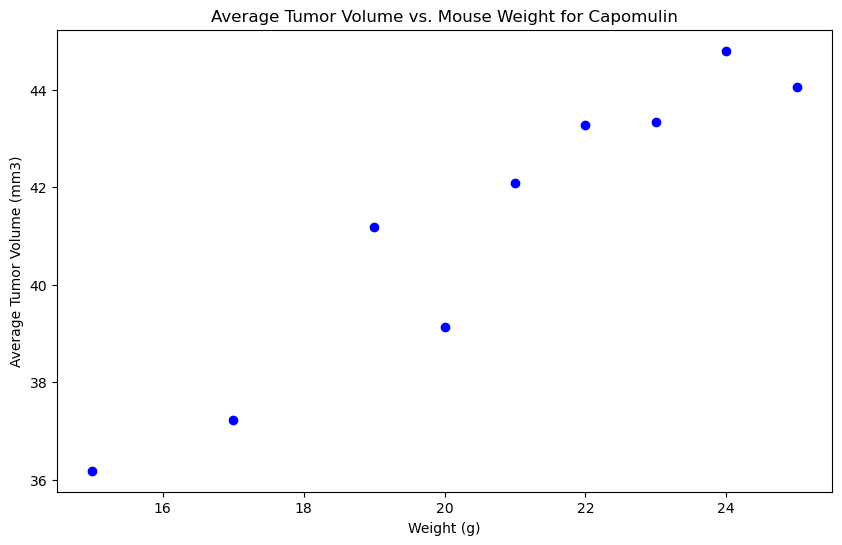

In [49]:
# Check the unique values in the 'Drug Regimen' column
#print(clean_data_copy_df['Drug Regimen'].unique())

# Strip whitespace from 'Drug Regimen' column
clean_data_copy_df['Drug Regimen'] = clean_data_copy_df['Drug Regimen'].str.strip()

# Filter for Capomulin regimen
capomulin_df = clean_data_copy_df[clean_data_copy_df['Drug Regimen'] == 'Capomulin']

# Check if the DataFrame has data
#print(capomulin_df)

# Group by mouse weight and calculate the average tumor volume
capomulin_df_avg = capomulin_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

# Check if the DataFrame has data after grouping
#print(capomulin_df_avg)

# Create the scatter plot if there is data
if not capomulin_df_avg.empty:
    plt.figure(figsize=(10, 6))
    plt.scatter(capomulin_df_avg['Weight (g)'], capomulin_df_avg['Tumor Volume (mm3)'], color='blue')
    plt.xlabel('Weight (g)')
    plt.ylabel('Average Tumor Volume (mm3)')
    plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin')
    # Set limits if necessary for slightly different view. Both plots look good.
    #plt.xlim(min(capomulin_df_avg['Weight (g)']) - 10, max(capomulin_df_avg['Weight (g)']) + 10)
    #plt.ylim(min(capomulin_df_avg['Tumor Volume (mm3)']) - 10, max(capomulin_df_avg['Tumor Volume (mm3)']) + 10)

    plt.show()


## Correlation and Regression

In [50]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy import stats

In [51]:
# Calculated the correlation coefficient
correlation = stats.pearsonr(capomulin_df_avg['Weight (g)'], capomulin_df_avg['Tumor Volume (mm3)'])
print(f"Correlation coefficient: {correlation[0]}")

Correlation coefficient: 0.950524396185527


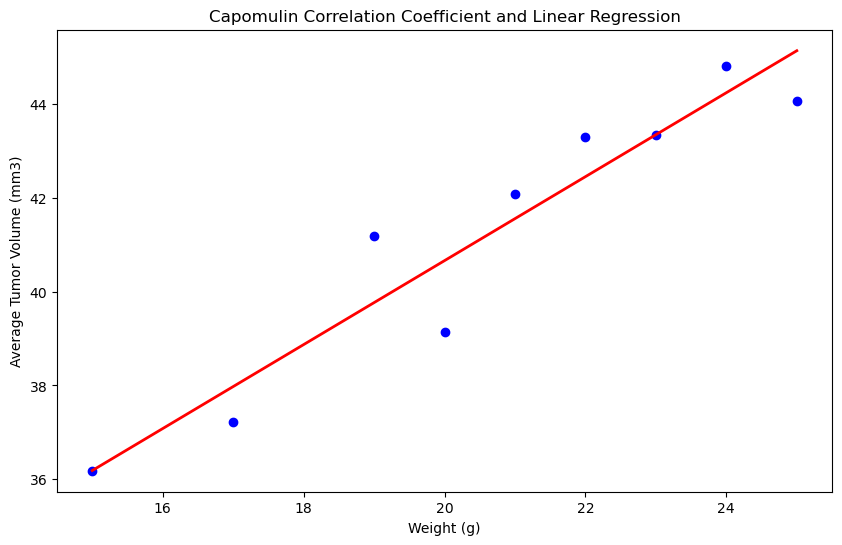

In [52]:
# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(capomulin_df_avg['Weight (g)'], capomulin_df_avg['Tumor Volume (mm3)'])

# Created linear regression line
regression_line = slope * capomulin_df_avg['Weight (g)'] + intercept

# Plot the regression line on top of the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_df_avg['Weight (g)'], capomulin_df_avg['Tumor Volume (mm3)'], color='blue')
plt.plot(capomulin_df_avg['Weight (g)'], regression_line, color='red', linewidth=2)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Correlation Coefficient and Linear Regression')
plt.show()
